In [63]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 26 18:31:33 2019

@author: krulvain
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import math
%matplotlib notebook

In [64]:
data=pd.read_csv("/home/krulvain/datasets/online_video/online_video_dataset/transcoding_mesurment.tsv",sep='\t')
for x,y in enumerate(data.dtypes):
    print(x,y)

0 object
1 float64
2 object
3 int64
4 int64
5 int64
6 float64
7 int64
8 int64
9 int64
10 int64
11 int64
12 int64
13 int64
14 int64
15 object
16 int64
17 float64
18 int64
19 int64
20 int64
21 float64


In [65]:
data.head(2)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980


In [66]:
lenc=LabelEncoder()
data.iloc[:,0]=lenc.fit_transform(data.iloc[:,0])
data.iloc[:,2]=lenc.fit_transform(data.iloc[:,2])
data.iloc[:,15]=lenc.fit_transform(data.iloc[:,15])
data=data.astype("float")
data.dtypes


id             float64
duration       float64
codec          float64
width          float64
height         float64
bitrate        float64
framerate      float64
i              float64
p              float64
b              float64
frames         float64
i_size         float64
p_size         float64
b_size         float64
size           float64
o_codec        float64
o_bitrate      float64
o_framerate    float64
o_width        float64
o_height       float64
umem           float64
utime          float64
dtype: object

In [75]:
npdata=data.to_numpy()

In [78]:
sum(np.isnan(npdata))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
sum(np.isinf(npdata))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
data.describe()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,...,6.878400e+04,68784.0,6.878400e+04,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,64.456720,286.413921,1.609822,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,...,2.218057e+07,0.0,2.502294e+07,1.504623,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,99.505995,287.257650,0.985630,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,...,5.097306e+07,0.0,5.414402e+07,1.118293,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,0.000000,31.080000,0.000000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,...,3.384500e+04,0.0,1.918790e+05,0.000000,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,30.000000,106.765000,1.000000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,...,1.851539e+06,0.0,2.258222e+06,1.000000,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,50.000000,239.141660,1.000000,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,...,6.166260e+06,0.0,7.881069e+06,2.000000,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,71.000000,379.320000,3.000000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,...,1.515506e+07,0.0,1.977335e+07,3.000000,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,1098.000000,25844.086000,3.000000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,...,7.689970e+08,0.0,8.067111e+08,3.000000,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [67]:
features=data.iloc[:,:-1]
target=data.iloc[:,-1]
trn_inp,tes_inp,trn_out,tes_out=tts(features,target,random_state=0)


<IPython.core.display.Javascript object>


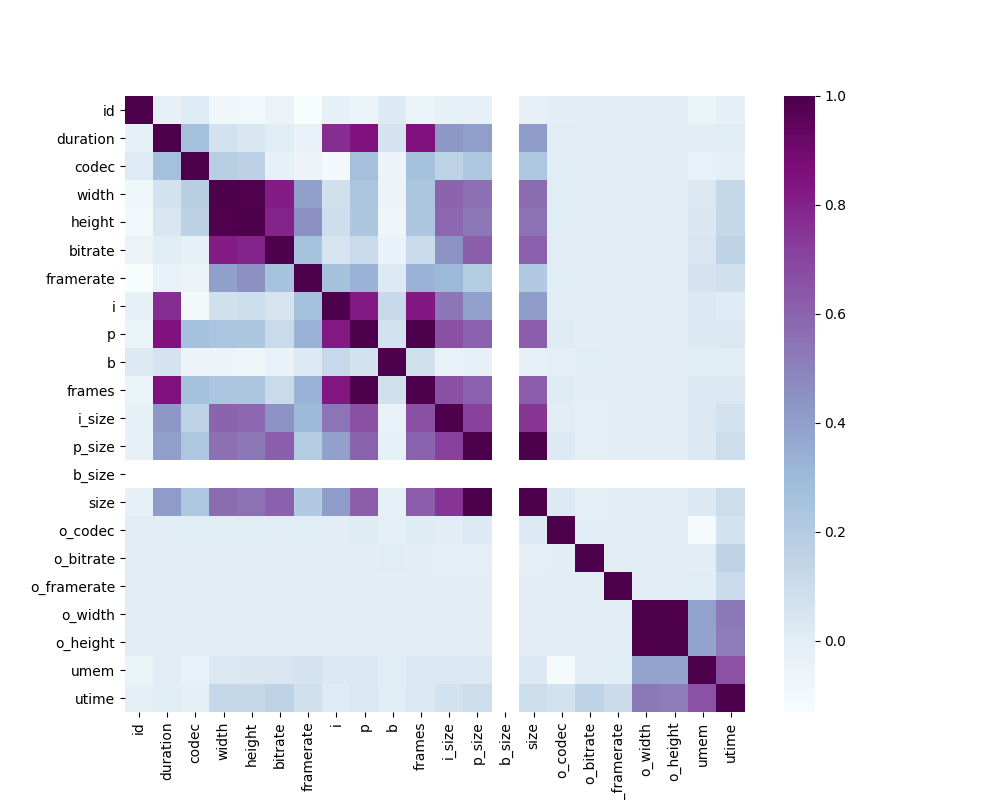

In [68]:
x=plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False,cmap="BuPu")
plt.show()


In [9]:
linreg=LinearRegression()
linreg.fit(trn_inp,trn_out)
print(linreg.intercept_)
print(linreg.coef_)
pred=linreg.predict(tes_inp)
print(r2_score(tes_out,pred))

-29.825999149095715
[ 3.30163166e-03  7.25746398e-04 -3.06928472e-01  7.87254893e-03
 -1.34609928e-02  1.58721427e-06  7.32869749e-02 -5.52196636e-03
  1.52235928e-03  2.57309372e-03 -1.42651337e-03 -5.44704730e-07
 -3.56936208e-07 -4.85722573e-16  3.61452259e-07  1.90161977e+00
  1.41379682e-06  2.49307255e-01  4.81958982e-03  6.35717319e-03
  9.19515574e-05]
0.5893388199272158


In [69]:
cols=list(data.columns[:-1])
print(cols)
def multol():
    for x in range(len(cols)):
        try:
            y=features.iloc[:,features.columns==cols[x]]
            X=features.iloc[:,features.columns !=cols[x]]
            mod=LinearRegression()
            mod.fit(X,y)
            print(" i={} name of col={},  vif= {}".format(x,cols[x],1/(1-mod.score(X,y))))
        except ZeroDivisionError:
            continue
multol()

['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem']
 i=0 name of col=id,  vif= 1.031060193440813
 i=1 name of col=duration,  vif= 9.334603691498057
 i=2 name of col=codec,  vif= 2.0813303403069967
 i=3 name of col=width,  vif= 86.73287332607144
 i=4 name of col=height,  vif= 83.24426070497816
 i=5 name of col=bitrate,  vif= 5.472199596487863
 i=6 name of col=framerate,  vif= 3.3600019704560062
 i=7 name of col=i,  vif= inf


/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


 i=8 name of col=p,  vif= inf
 i=9 name of col=b,  vif= inf


/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


 i=10 name of col=frames,  vif= inf
 i=11 name of col=i_size,  vif= 8907.427574015936
 i=12 name of col=p_size,  vif= 1234553.5729650855
 i=14 name of col=size,  vif= 1392745.4907936289
 i=15 name of col=o_codec,  vif= 1.015483658353088
 i=16 name of col=o_bitrate,  vif= 1.0000777055054364
 i=17 name of col=o_framerate,  vif= 1.0000179406535785
 i=18 name of col=o_width,  vif= 91.73482456394639
 i=19 name of col=o_height,  vif= 91.20233189627689
 i=20 name of col=umem,  vif= 1.2093925512694932


In [70]:
features2=features

In [71]:
features2.drop(["height","i_size","p_size","size"],inplace=True,axis=1)
ncols=features2.columns

/home/krulvain/ml/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
def multo():
    for x in range(len(ncols)):
        try:
            y=features2.iloc[:,features2.columns==ncols[x]]
            X=features2.iloc[:,features2.columns !=ncols[x]]
            mod=LinearRegression()
            mod.fit(X,y)
            print(" i={} name of col={},  vif= {:.2f}".format(x,cols[x],1/(1-mod.score(X,y))))
        except ZeroDivisionError:
            continue
multo()

 i=0 name of col=id,  vif= 1.03
 i=1 name of col=duration,  vif= 6.75
 i=2 name of col=codec,  vif= 2.00
 i=3 name of col=width,  vif= 4.06
 i=4 name of col=height,  vif= 3.42
 i=5 name of col=bitrate,  vif= 2.16


/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


 i=6 name of col=framerate,  vif= inf
 i=7 name of col=i,  vif= inf
 i=8 name of col=p,  vif= inf


/home/krulvain/ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


 i=9 name of col=b,  vif= inf
 i=11 name of col=i_size,  vif= 1.02
 i=12 name of col=p_size,  vif= 1.00
 i=13 name of col=b_size,  vif= 1.00
 i=14 name of col=size,  vif= 91.73
 i=15 name of col=o_codec,  vif= 91.20
 i=16 name of col=o_bitrate,  vif= 1.21


In [73]:
trn_inpn,tes_inpn,trn_outn,tes_outn=tts(features2,target,random_state=0)
regn=LinearRegression()
x=regn.fit(trn_inpn,trn_outn)
predt=regn.predict(trn_inpn)
predn=regn.predict(tes_inpn)
print("r^2 for new={}".format(r2_score(tes_out,pred)))
print("mean squared error while training={}".format(math.sqrt(mean_squared_error(trn_outn,predt))))
print("mean squared error during testing={}".format(math.sqrt(mean_squared_error(tes_outn,predn))))


r^2 for new=0.5893388199272158
mean squared error while training=10.260028733067571
mean squared error during testing=10.308333868308763
